## SUV buyer  classification

# Vikash Gupta (203040031)

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#to disable all the warnings
import warnings
warnings.filterwarnings('ignore')


### Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [5]:
#X is a matrix
#y is a vector

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Defining the Confusion Matrix and Classification Report

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

def confusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    
def classification_Report(y_test, y_pred):
    class_report = classification_report(y_test, y_pred)
    print(class_report)


### For Visualising the results

In [9]:
from matplotlib.colors import ListedColormap

%matplotlib inline
plt.rcParams['figure.figsize']=9,6

def mapVisualisation(title, classifier,X,y):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

## Training the Logistic Regression model on the Training set

### (linear classifier)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
#Predicting the Test set results
y_pred_log = classifier_log.predict(X_test)

In [12]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [13]:
#predicted values
y_pred_log

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [14]:
#find confusion matrix
confusionMatrix(y_test, y_pred_log)

[[65  3]
 [ 8 24]]


In [15]:
# find Classification report
classification_Report(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


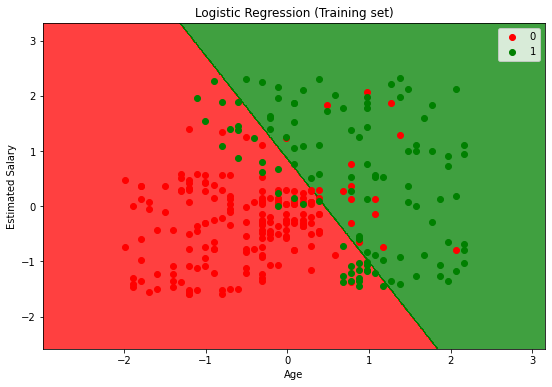

In [16]:
# Visualising the Training set results

mapVisualisation('Logistic Regression (Training set)', classifier_log,X_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


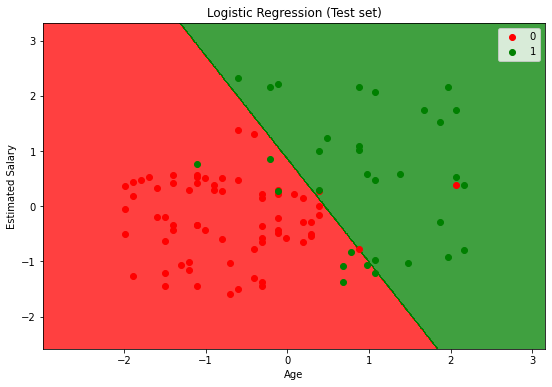

In [17]:
# Visualising the Test set results

mapVisualisation('Logistic Regression (Test set)', classifier_log,X_test,y_test)

## Training the K-NN model on the Training set

### (non-linear classifier)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
#Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [20]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [21]:
#predicted values
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [22]:
#find confusion matrix
confusionMatrix(y_test, y_pred_knn)

[[64  4]
 [ 3 29]]


In [23]:
# find Classification report
classification_Report(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


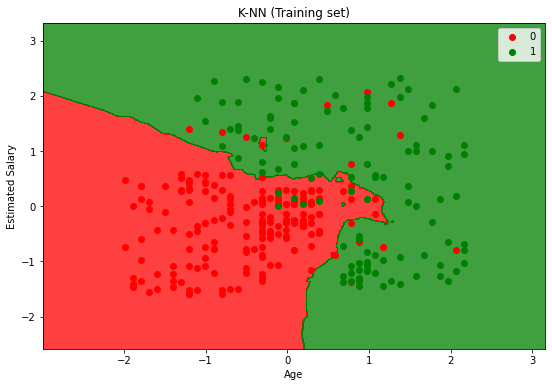

In [24]:
# Visualising the Training set results

mapVisualisation('K-NN (Training set)', classifier_knn,X_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


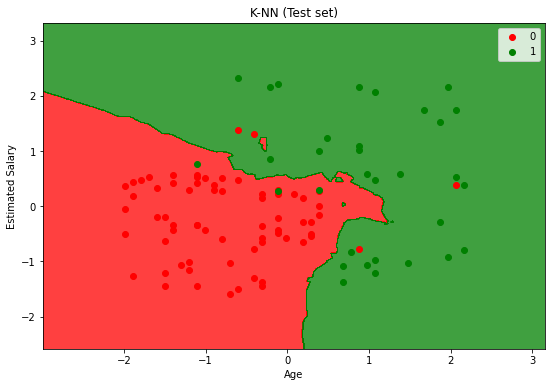

In [25]:
# Visualising the Test set results

mapVisualisation('K-NN (Test set)', classifier_knn,X_test,y_test)

## Training the SVM model on the Training set

### (linear classification)

In [26]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [27]:
#Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [28]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [29]:
#predicted values
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [30]:
#find confusion matrix
confusionMatrix(y_test, y_pred_svm)

[[66  2]
 [ 8 24]]


In [31]:
# find Classification report
classification_Report(y_test, y_pred_svm)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


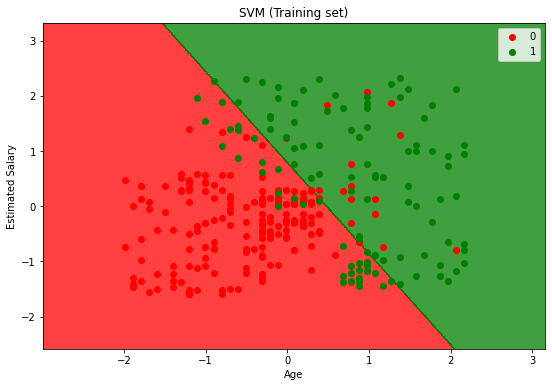

In [32]:
# Visualising the Training set results

mapVisualisation('SVM (Training set)', classifier_svm,X_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


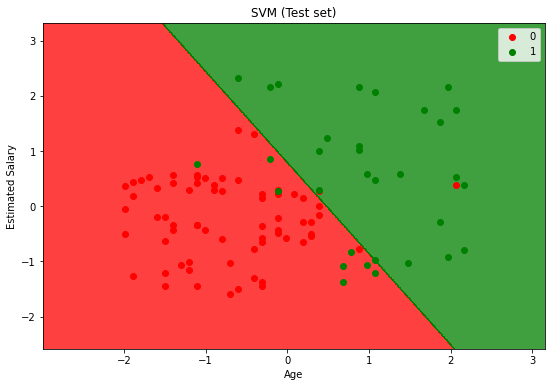

In [33]:
# Visualising the Test set results

mapVisualisation('SVM (Test set)', classifier_svm,X_test,y_test)


## Training the Kernel SVM model on the Training set

### (non-linear classifier)

In [34]:
from sklearn.svm import SVC
classifier_ker = SVC(kernel = 'rbf', random_state = 0)
classifier_ker.fit(X_train, y_train)

SVC(random_state=0)

In [35]:
#Predicting the Test set results
y_pred_ker = classifier_ker.predict(X_test)

In [36]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [37]:
#predicted values
y_pred_ker

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [38]:
#find confusion matrix
confusionMatrix(y_test, y_pred_ker)

[[64  4]
 [ 3 29]]


In [39]:
# find Classification report
classification_Report(y_test, y_pred_ker)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


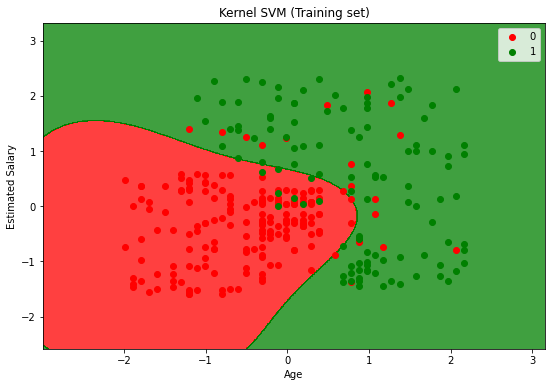

In [40]:
# Visualising the Training set results

mapVisualisation('Kernel SVM (Training set)', classifier_ker,X_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


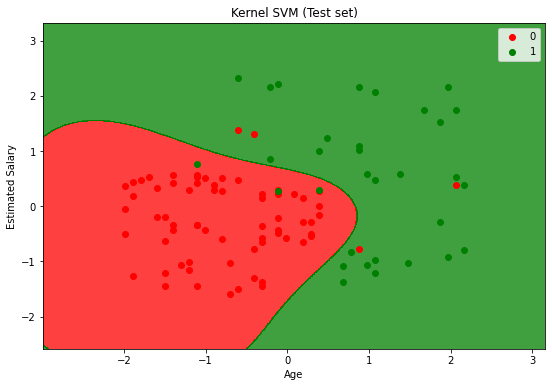

In [41]:
# Visualising the Test set results

mapVisualisation('Kernel SVM (Test set)', classifier_ker,X_test,y_test)


## Training the Decision Tree Classification model on the Training set

### (non-linear classifier)

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
#Predicting the Test set results
y_pred_dtc = classifier_dtc.predict(X_test)

In [44]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [45]:
#predicted values
y_pred_dtc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [46]:
#find confusion matrix
confusionMatrix(y_test, y_pred_dtc)

[[62  6]
 [ 3 29]]


In [47]:
# find Classification report
classification_Report(y_test, y_pred_dtc)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


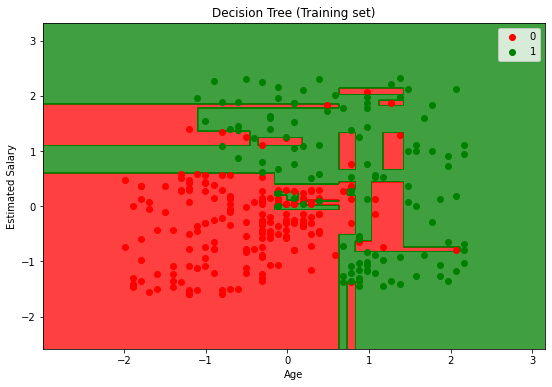

In [48]:
# Visualising the Training set results

mapVisualisation('Decision Tree (Training set)', classifier_dtc,X_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


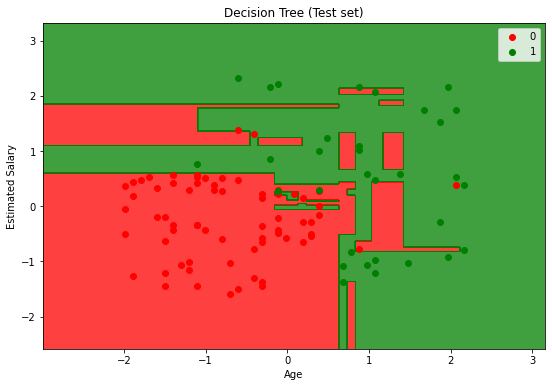

In [49]:
# Visualising the Test set results

mapVisualisation('Decision Tree (Test set)', classifier_dtc,X_test,y_test)


## Training the Random Forest Classification model on the Training set

### (non-linear classifier)

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_rfc = RandomForestClassifier(n_estimators =150, criterion = 'entropy', random_state = 0)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [51]:
#Predicting the Test set results
y_pred_rfc = classifier_rfc.predict(X_test)

In [52]:
#true values
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [53]:
#predicted values
y_pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [54]:
#true values vs predicted values
print(np.concatenate((y_pred_rfc.reshape(len(y_pred_rfc),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [55]:
#find confusion matrix
confusionMatrix(y_test, y_pred_rfc)

[[63  5]
 [ 4 28]]


In [56]:
# find Classification report
classification_Report(y_test, y_pred_rfc)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


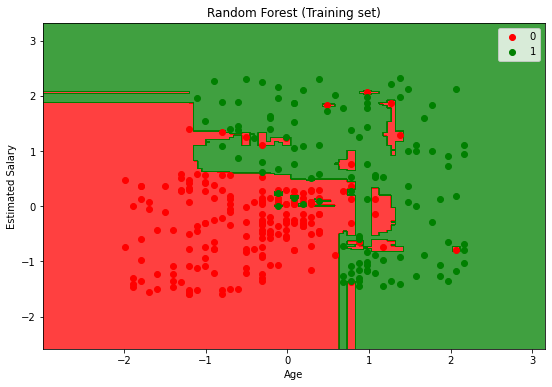

In [57]:
# Visualising the Training set results

mapVisualisation('Random Forest (Training set)', classifier_rfc,X_train,y_train)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


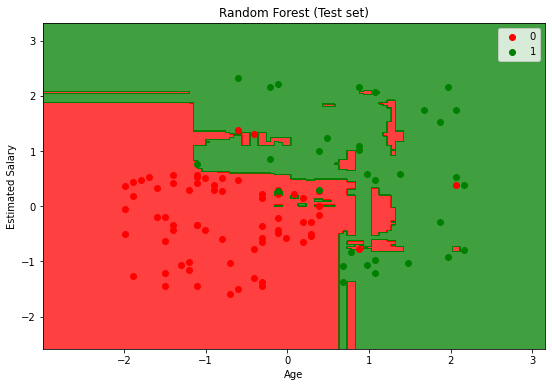

In [58]:
# Visualising the Test set results

mapVisualisation('Random Forest (Test set)', classifier_rfc,X_test,y_test)

### Comparing the data models that fits the best

In [59]:
# Model Accuracy, how often is the classifier correct?

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [60]:
# Applying k-Fold Cross Validation on Logistic Regression
accuracies = cross_val_score(estimator = classifier_log, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [76.66666666666667, 86.66666666666667, 73.33333333333333, 86.66666666666667, 70.0, 66.66666666666666, 83.33333333333334, 93.33333333333333, 96.66666666666667, 90.0]


Mean Accuracy: 82.33 %
Standard Deviation: 9.67 %


In [61]:
print('Accuracy of Logistic Regression on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_log)*100))

Accuracy of Logistic Regression on test set: 89.00%


In [62]:
# Applying k-Fold Cross Validation on KNN Classifier
accuracies = cross_val_score(estimator = classifier_knn, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [83.33333333333334, 96.66666666666667, 76.66666666666667, 93.33333333333333, 86.66666666666667, 90.0, 90.0, 93.33333333333333, 100.0, 96.66666666666667]


Mean Accuracy: 90.67 %
Standard Deviation: 6.63 %


In [63]:
print('Accuracy of KNN Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_knn)*100))

Accuracy of KNN Classifier on test set: 93.00%


In [64]:
# Applying k-Fold Cross Validation on SVM Classifier
accuracies = cross_val_score(estimator = classifier_svm, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [76.66666666666667, 80.0, 73.33333333333333, 83.33333333333334, 73.33333333333333, 66.66666666666666, 83.33333333333334, 93.33333333333333, 96.66666666666667, 86.66666666666667]


Mean Accuracy: 81.33 %
Standard Deviation: 8.84 %


In [65]:
print('Accuracy of SVM Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_svm)*100))

Accuracy of SVM Classifier on test set: 90.00%


In [66]:
# Applying k-Fold Cross Validation on Kernel SVM Classifier
accuracies = cross_val_score(estimator = classifier_ker, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [80.0, 96.66666666666667, 80.0, 96.66666666666667, 86.66666666666667, 86.66666666666667, 90.0, 93.33333333333333, 100.0, 93.33333333333333]


Mean Accuracy: 90.33 %
Standard Deviation: 6.57 %


In [67]:
print('Accuracy of Kernel SVM Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_ker)*100))

Accuracy of Kernel SVM Classifier on test set: 93.00%


In [68]:
# Applying k-Fold Cross Validation on Decision Tree Classifier
accuracies = cross_val_score(estimator = classifier_dtc, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [83.33333333333334, 86.66666666666667, 70.0, 83.33333333333334, 86.66666666666667, 83.33333333333334, 90.0, 86.66666666666667, 96.66666666666667, 83.33333333333334]


Mean Accuracy: 85.00 %
Standard Deviation: 6.37 %


In [69]:
print('Accuracy of Decision Tree Classifier on test set: {:.2f}%'.format(accuracy_score(y_test, y_pred_dtc)*100))

Accuracy of Decision Tree Classifier on test set: 91.00%


In [70]:
# Applying k-Fold Cross Validation on Random Forest Classifier
accuracies = cross_val_score(estimator = classifier_rfc, X = X_train, y = y_train, cv = 10)
print("Accuracies:",list(accuracies*100))
print("\n")
print("Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracies: [83.33333333333334, 90.0, 80.0, 93.33333333333333, 83.33333333333334, 83.33333333333334, 93.33333333333333, 90.0, 100.0, 96.66666666666667]


Mean Accuracy: 89.33 %
Standard Deviation: 6.29 %


# Thank You!